In [1]:
pip install pyspark

In [2]:
from pyspark.sql import SparkSession

# Создаем Spark сессию
spark = SparkSession.builder.appName("PublicCateringAnalysis").getOrCreate()

# Загружаем данные
data = spark.read.csv("data.csv", header=True, inferSchema=True, sep=";")

# Показываем первые несколько строк данных
data.show(5)


+---------+--------------------+---------+----------------+--------------------+-----------+--------------------+-----------------+--------------------+------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+----+
|       ID|                Name|global_id|     IsNetObject|    OperatingCompany| TypeObject|             AdmArea|         District|             Address|       PublicPhone|          SeatsCount|    SocialPrivileges|    Longitude_WGS84|     Latitude_WGS84|             geoData|      geodata_center|_c16|
+---------+--------------------+---------+----------------+--------------------+-----------+--------------------+-----------------+--------------------+------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+----+
|      Код|        Наименование|global_id|Является сетевым|Название управляю...|Вид объекта|Админ

In [3]:
# Количество объектов по административным округам
adm_area_count = data.groupBy("AdmArea").count().orderBy("count", ascending=False)
adm_area_count.show()


+--------------------+-----+
|             AdmArea|count|
+--------------------+-----+
|Центральный админ...| 5591|
|Южный администрат...| 2486|
|Северный админист...| 1990|
|Северо-Восточный ...| 1986|
|Западный админист...| 1973|
|Восточный админис...| 1701|
|Юго-Западный адми...| 1636|
|Юго-Восточный адм...| 1432|
|Северо-Западный а...| 1131|
|Новомосковский ад...|  973|
|Зеленоградский ад...|  345|
|Троицкий админист...|  193|
|Административный ...|    1|
+--------------------+-----+



In [4]:
# Количество объектов по типам объектов
type_object_count = data.groupBy("TypeObject").count().orderBy("count", ascending=False)
type_object_count.show()


+--------------------+-----+
|          TypeObject|count|
+--------------------+-----+
|                кафе| 7594|
|предприятие быстр...| 3739|
|            ресторан| 2542|
|           кафетерий| 2273|
|            столовая| 2108|
|                 бар| 1424|
|          закусочная|  644|
|магазин (отдел ку...|  458|
|               буфет|  407|
|    заготовочный цех|  167|
|ночной клуб (диск...|   81|
|         Вид объекта|    1|
+--------------------+-----+



In [5]:
# Среднее количество посадочных мест по типам объектов
average_seats_by_type = data.groupBy("TypeObject").agg({"SeatsCount": "avg"}).orderBy("TypeObject")
average_seats_by_type.show()


+--------------------+------------------+
|          TypeObject|   avg(SeatsCount)|
+--------------------+------------------+
|         Вид объекта|              NULL|
|                 бар| 35.00351123595506|
|               буфет|42.764127764127764|
|    заготовочный цех| 1.467065868263473|
|          закусочная| 5.754658385093168|
|                кафе| 27.33447458519884|
|           кафетерий| 7.211614606247251|
|магазин (отдел ку...| 4.853711790393013|
|ночной клуб (диск...|101.11111111111111|
|предприятие быстр...| 13.97325488098422|
|            ресторан| 84.99095200629425|
|            столовая|123.18074003795067|
+--------------------+------------------+



In [6]:
# Количество объектов по районам
district_count = data.groupBy("District").count().orderBy("count", ascending=False)
district_count.show()


+--------------------+-----+
|            District|count|
+--------------------+-----+
|      Тверской район| 1093|
|   Пресненский район|  882|
|     Басманный район|  826|
|   Даниловский район|  672|
| район Замоскворечье|  514|
|     район Хамовники|  487|
|     Таганский район|  444|
|     Мещанский район|  424|
|Красносельский район|  392|
|поселение Московский|  331|
|         район Арбат|  308|
|район Тропарёво-Н...|  293|
|       район Раменки|  275|
|   Хорошёвский район|  266|
| поселение Сосенское|  261|
|     Бутырский район|  243|
|       район Марьино|  233|
|район Соколиная Гора|  231|
|        район Митино|  231|
|      район Отрадное|  225|
+--------------------+-----+
only showing top 20 rows



In [7]:
# Количество сетевых объектов
network_count = data.groupBy("IsNetObject").count().orderBy("count", ascending=False)
network_count.show()


+----------------+-----+
|     IsNetObject|count|
+----------------+-----+
|             нет|17423|
|              да| 4014|
|Является сетевым|    1|
+----------------+-----+



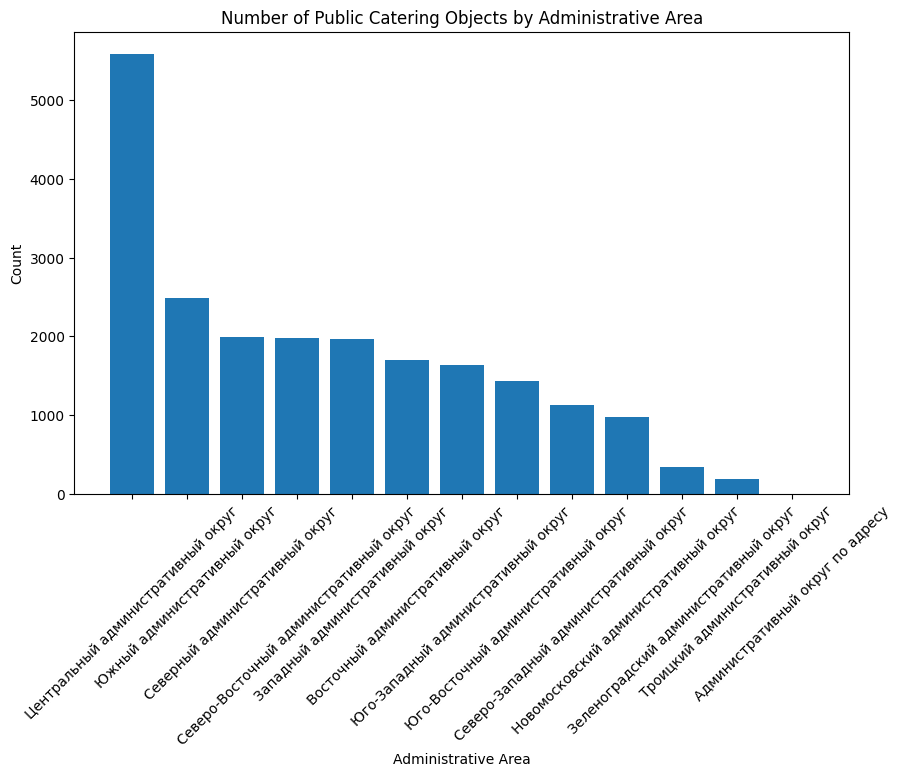

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Преобразуем данные в Pandas DataFrame для визуализации
adm_area_count_pd = adm_area_count.toPandas()

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(adm_area_count_pd["AdmArea"], adm_area_count_pd["count"])
plt.xlabel("Administrative Area")
plt.ylabel("Count")
plt.title("Number of Public Catering Objects by Administrative Area")
plt.xticks(rotation=45)
plt.show()


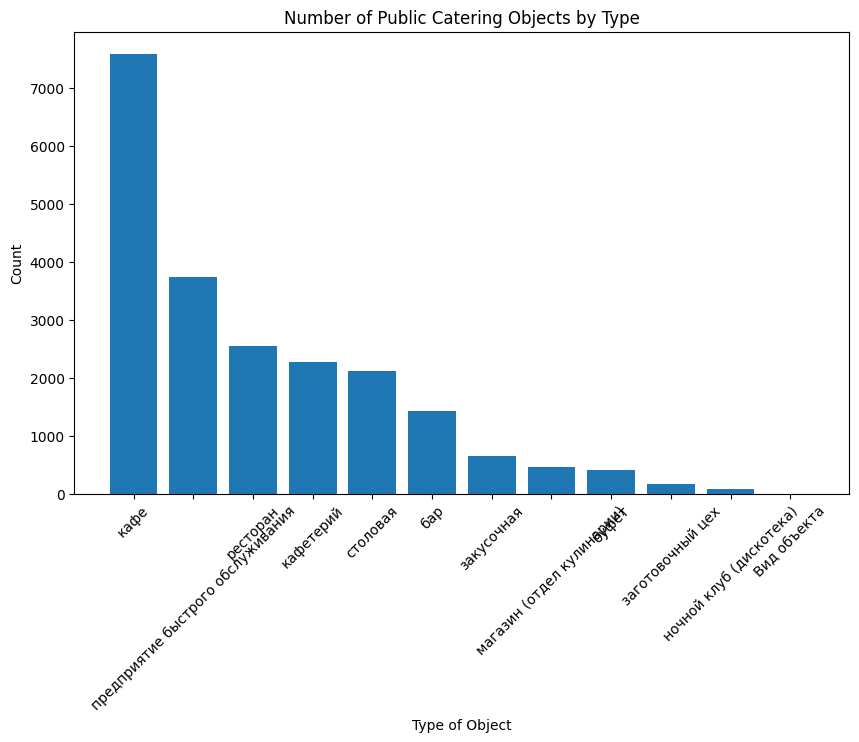

In [9]:
# Преобразуем данные в Pandas DataFrame для визуализации
type_object_count_pd = type_object_count.toPandas()

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(type_object_count_pd["TypeObject"], type_object_count_pd["count"])
plt.xlabel("Type of Object")
plt.ylabel("Count")
plt.title("Number of Public Catering Objects by Type")
plt.xticks(rotation=45)
plt.show()


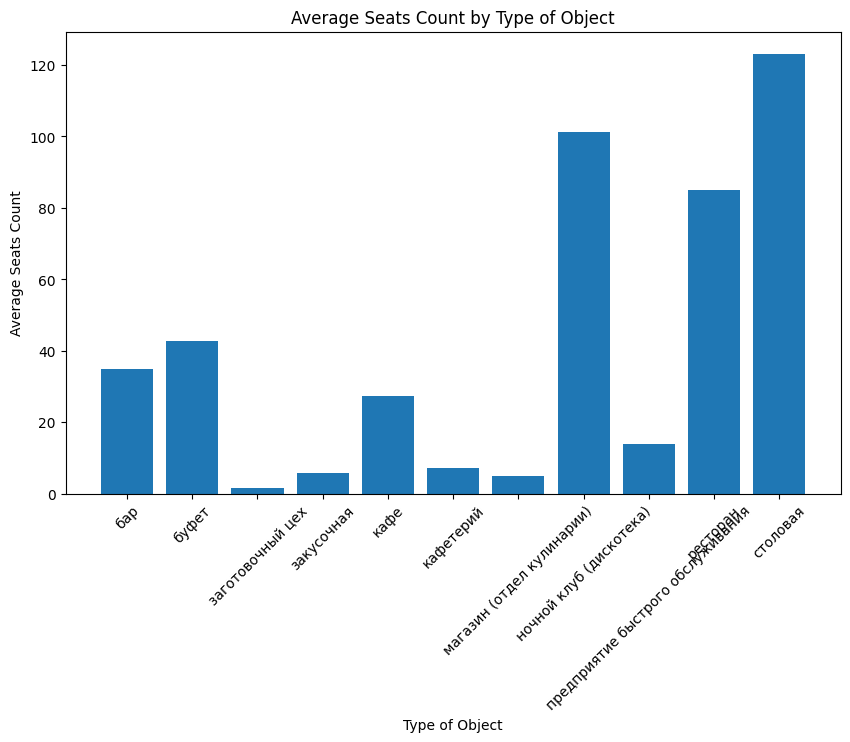

In [10]:
# Преобразуем данные в Pandas DataFrame для визуализации
average_seats_by_type_pd = average_seats_by_type.toPandas()

# Строим график
plt.figure(figsize=(10, 6))
plt.bar(average_seats_by_type_pd["TypeObject"], average_seats_by_type_pd["avg(SeatsCount)"])
plt.xlabel("Type of Object")
plt.ylabel("Average Seats Count")
plt.title("Average Seats Count by Type of Object")
plt.xticks(rotation=45)
plt.show()
